<a href="https://colab.research.google.com/github/HugoLeda/machine_learning/blob/main/breast_cancer%20-%20random%20forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve

In [38]:
!pip install wget

In [39]:
!wget https://raw.githubusercontent.com/HugoLeda/machine_learning/main/assets/breast-cancer.csv

--2024-06-20 00:14:32--  https://raw.githubusercontent.com/HugoLeda/machine_learning/main/assets/breast-cancer.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124571 (122K) [text/plain]
Saving to: ‘breast-cancer.csv.1’

breast-cancer.csv.1 100%[===================>] 121.65K  --.-KB/s    in 0.02s   

2024-06-20 00:14:32 (7.13 MB/s) - ‘breast-cancer.csv.1’ saved [124571/124571]



In [40]:
df = pd.read_csv('breast-cancer.csv')
df.shape

(569, 32)

In [41]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [43]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [45]:
df.rename(columns={'diagnosis': 'label'}, inplace=True)

In [46]:
df['label'].unique()

array(['M', 'B'], dtype=object)

In [47]:
df['label'] = df['label'].replace({'M': 1, 'B': 0}) # definindo label como 1 para maligno e 0 para benigno

In [48]:
df['label'].unique()

array([1, 0])

In [49]:
df['label'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: label
Non-Null Count  Dtype
--------------  -----
569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


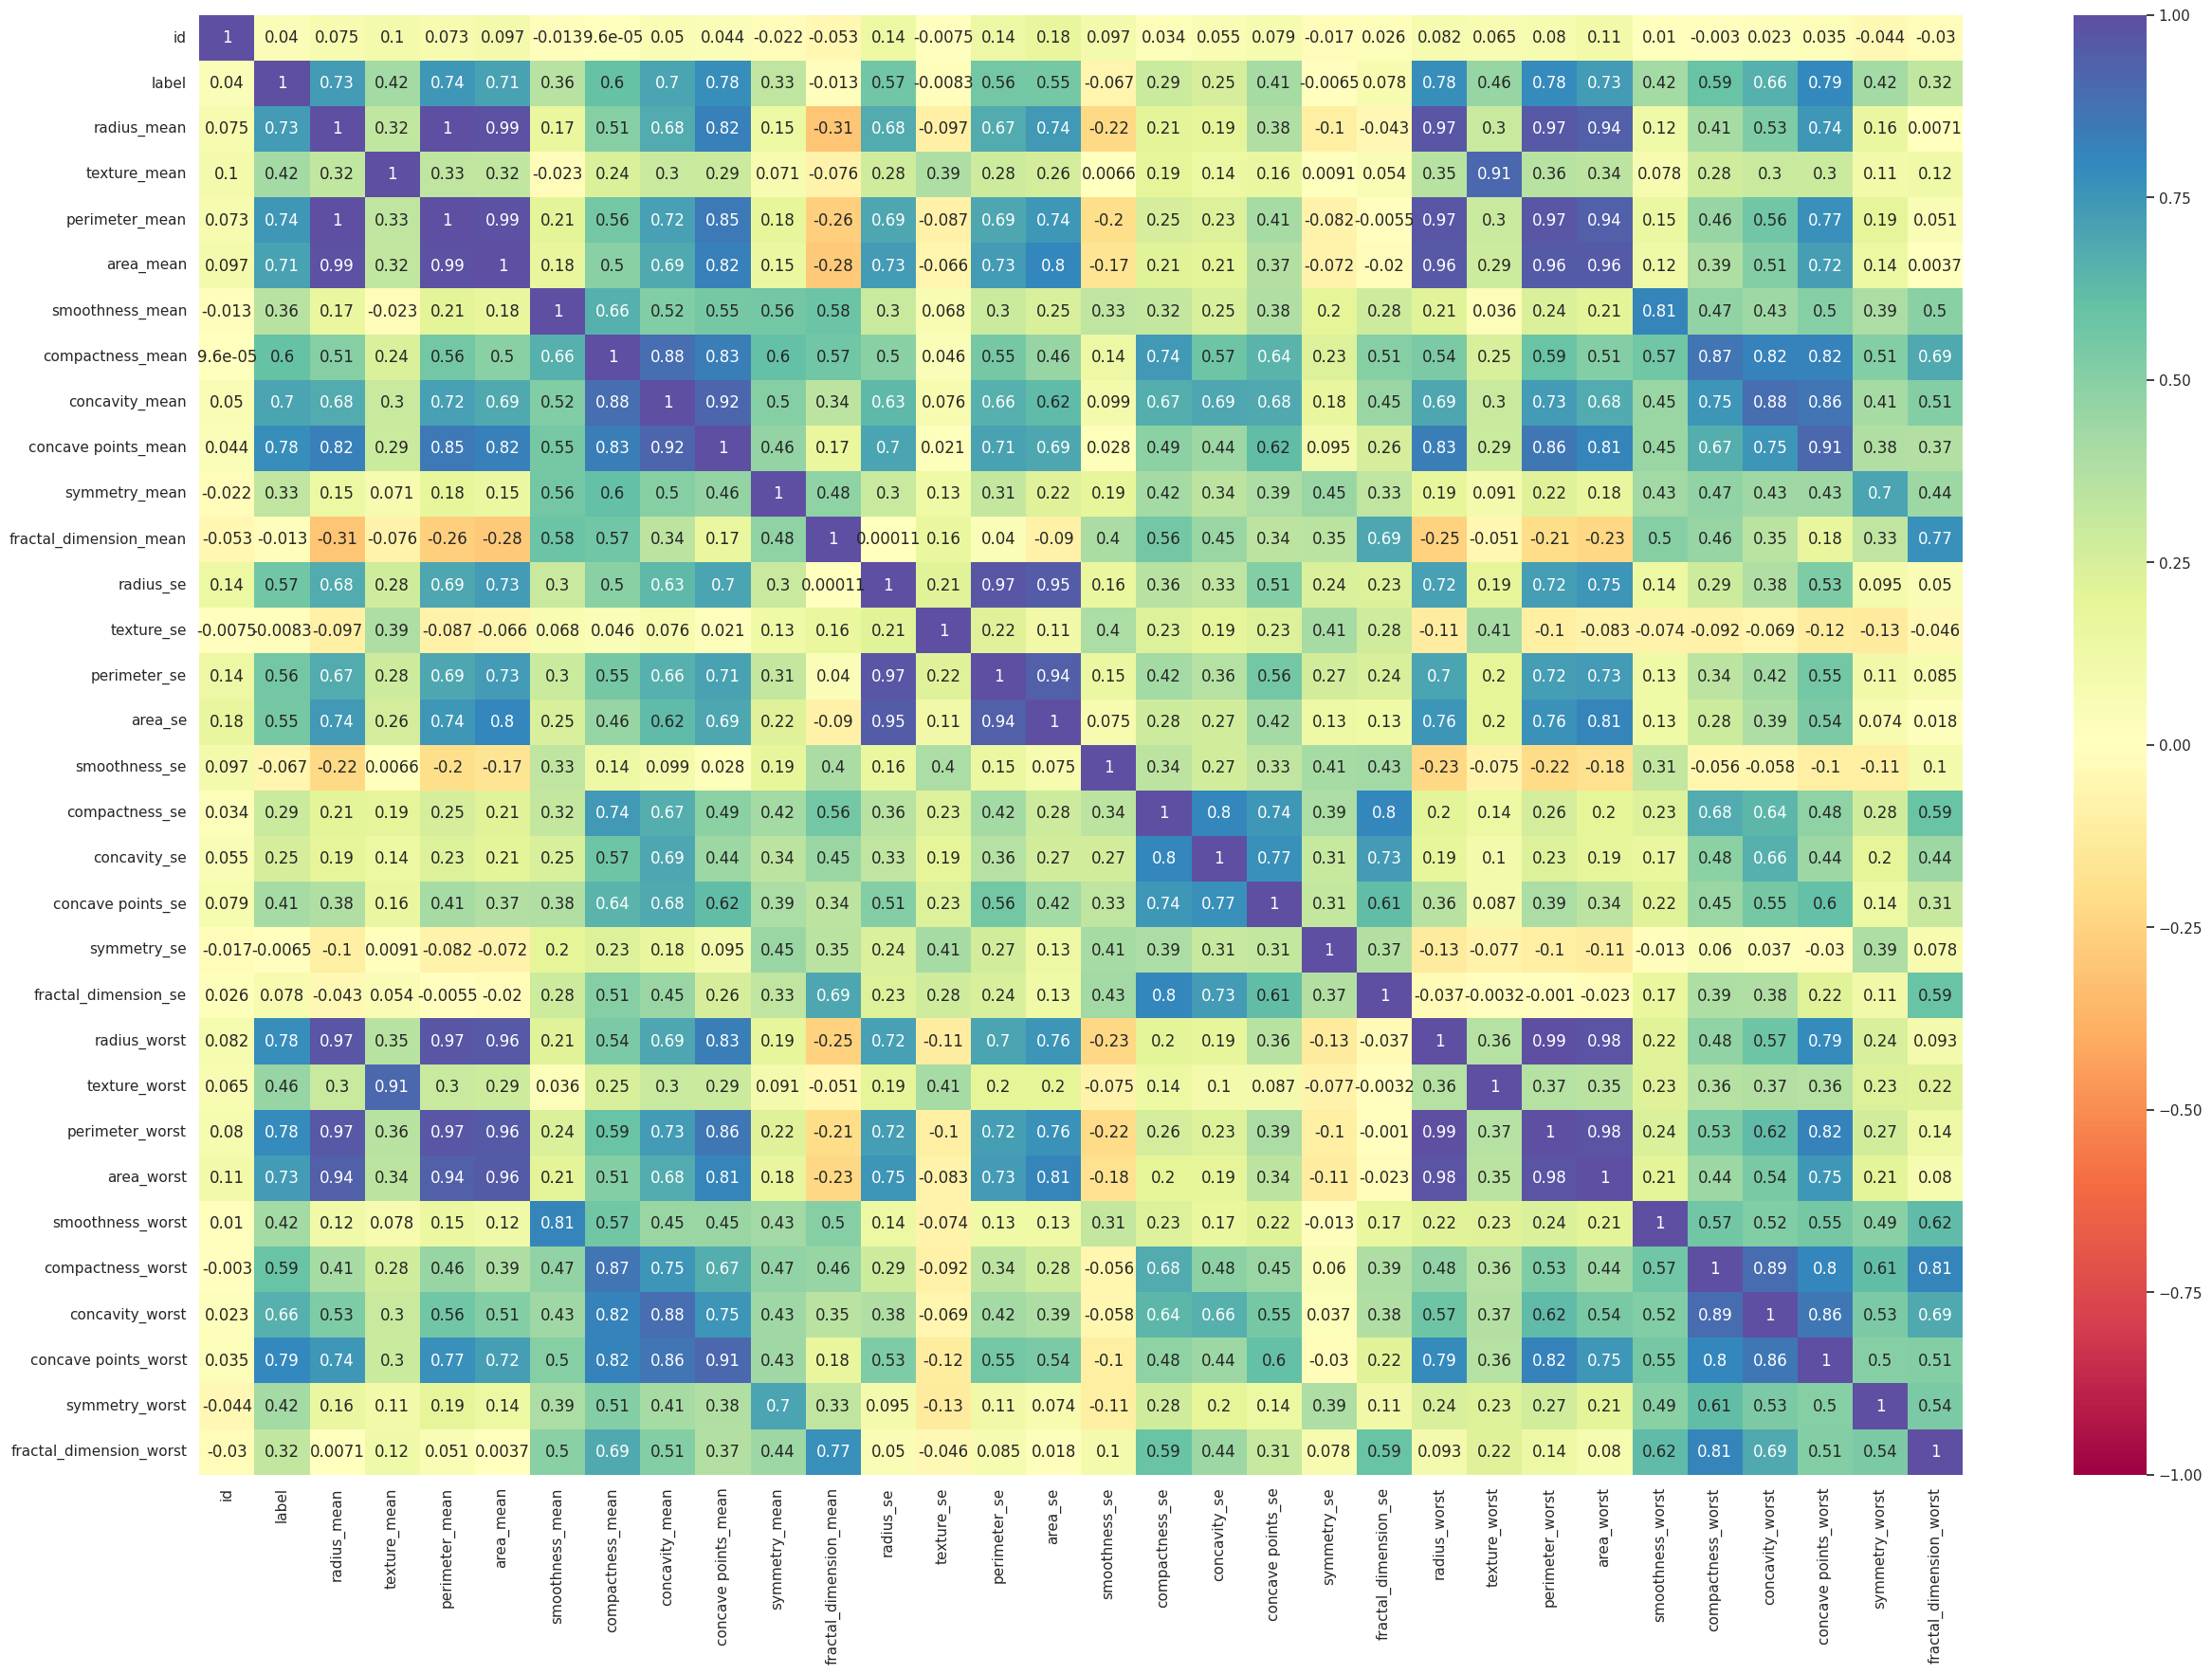

In [50]:
sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="Spectral", annot=True)
plt.show()
plt.close()

In [51]:
correlation_matrix = df.corr()
label_correlations = correlation_matrix['label']
filtered_features = label_correlations[(label_correlations > -0.3) & (label_correlations < 0.3)]

print(filtered_features)

id                        0.039769
fractal_dimension_mean   -0.012838
texture_se               -0.008303
smoothness_se            -0.067016
compactness_se            0.292999
concavity_se              0.253730
symmetry_se              -0.006522
fractal_dimension_se      0.077972
Name: label, dtype: float64


In [52]:
columns_to_drop = filtered_features.index.tolist()
df = df.drop(columns=columns_to_drop)

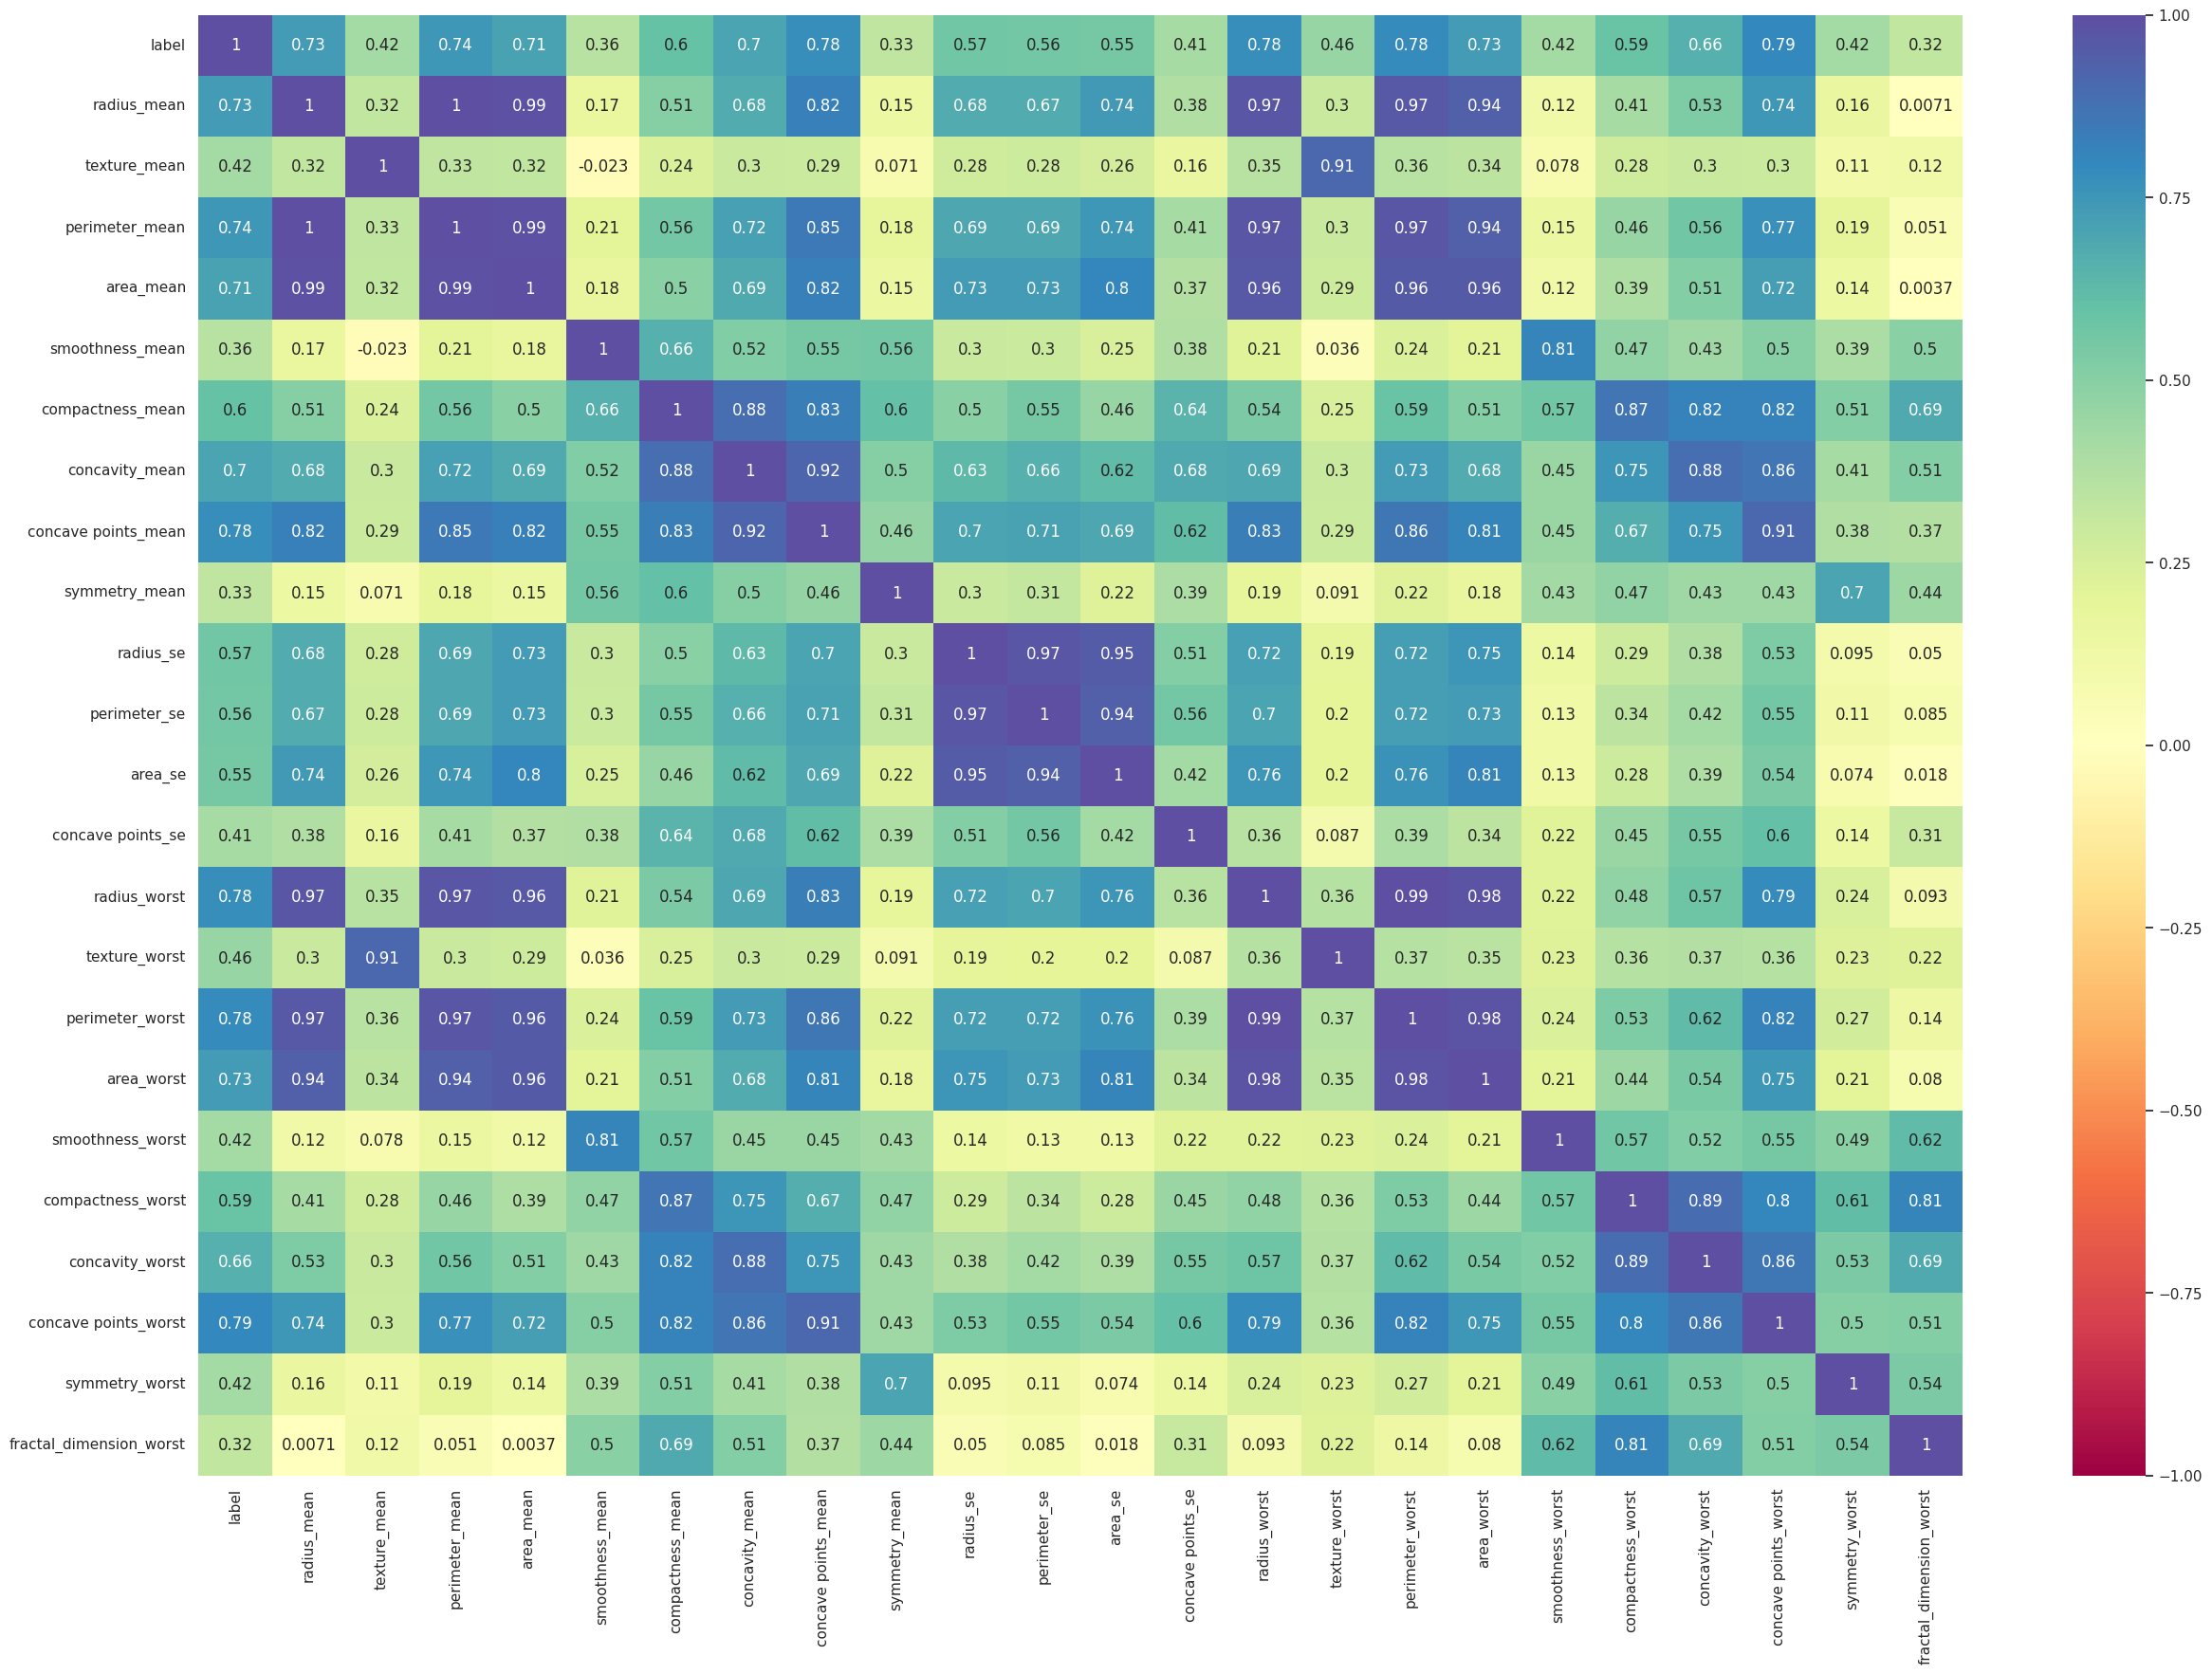

In [53]:
sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="Spectral", annot=True)
plt.show()
plt.close()

In [54]:
df.head()

,label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


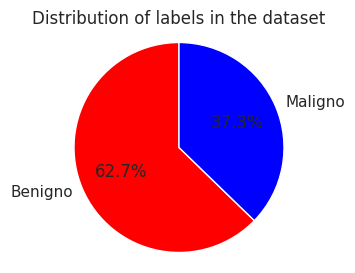

In [55]:
total_records = df.shape[0]

positives = df[df['label'] == 1].shape[0]
negatives = df[df['label'] == 0].shape[0]

percentage_negatives = (negatives / total_records) * 100
percentage_positives = (positives / total_records) * 100

labels = ['Benigno', 'Maligno']

colors = ['red', 'blue']
values = [percentage_negatives, percentage_positives]

plt.figure(figsize=(4, 3))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of labels in the dataset')
plt.axis('equal')

plt.show()

In [56]:
X = df.drop('label', axis=1)
y = df['label']

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [64]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=600),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

results = []

for name, model in models.items():
  model.fit(X_train, Y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  accuracy_train = accuracy_score(Y_train, y_pred_train)
  accuracy_test = accuracy_score(Y_test, y_pred_test)

  report_train = classification_report(Y_train, y_pred_train, output_dict=True)
  report_test = classification_report(Y_test, y_pred_test, output_dict=True)

  results.append({
      'Model': name,
      'Train accuracy': accuracy_train,
      'Test accuracy': accuracy_test,
      **report_train['weighted avg'],
      **report_test['weighted avg']
  })

df_results = pd.DataFrame(results)

df_results_sorted = df_results.sort_values(by='Train accuracy', ascending=False)

def style_format(val):
  if val == df_results_sorted.iloc[0]['Model']:
    color = 'green'
  elif val == df_results_sorted.iloc[1]['Model']:
    color = 'yellow'
  elif val == df_results_sorted.iloc[2]['Model']:
    color = 'red'
  else:
    color = 'black'
  return f'color: {color}; text-align: left;'

styled_df = df_results_sorted.style.applymap(style_format, subset=['Model'])

styled_df

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Train accuracy,Test accuracy,precision,recall,f1-score,support
0,Random Forest,1.000000,0.964912,0.966759,0.964912,0.964509,114
4,Decision Tree,1.000000,0.921053,0.920798,0.921053,0.920849,114
1,Logistic Regression,0.949451,0.947368,0.948753,0.947368,0.946764,114
3,KNN,0.949451,0.912281,0.918111,0.912281,0.909972,114
2,SVM,0.918681,0.912281,0.922978,0.912281,0.909202,114


In [68]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [69]:
y_pred = model.predict(X_test)

In [74]:
print("ClassificationReport (Training Set):\n", classification_report(Y_test, y_pred))

ClassificationReport (Training Set):
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [75]:
scores = cross_val_score(model, X, y, cv=5)
print(f'Acurácia média com validação cruzada: {scores.mean()}')

Acurácia média com validação cruzada: 0.9631113181183046


In [77]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [4, 8, 16],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print("Melhores hiperparâmetros:\n")
print(f"Melhor resultado: {grid_search.best_score_}")
print(f"Melhores parâmetros: {grid_search.best_params_}")

Melhores hiperparâmetros:

Melhor resultado: 0.9701443875174662
Melhores parâmetros: {'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [81]:
modelHP = RandomForestClassifier(max_depth=8, max_features='log2', min_samples_leaf=2, min_samples_split=2, n_estimators=200)
modelHP.fit(X_train, Y_train)

RandomForestClassifier(max_depth=8, max_features='log2', min_samples_leaf=2,
                       n_estimators=200)

In [82]:
y_pred2 = modelHP.predict(X_test)

In [97]:
print("Métricas:\n", classification_report(Y_test, y_pred2))

Métricas:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [84]:
scores = cross_val_score(modelHP, X, y, cv=5)
print(f'Acurácia média com validação cruzada: {scores.mean()}')

Acurácia média com validação cruzada: 0.9631113181183044


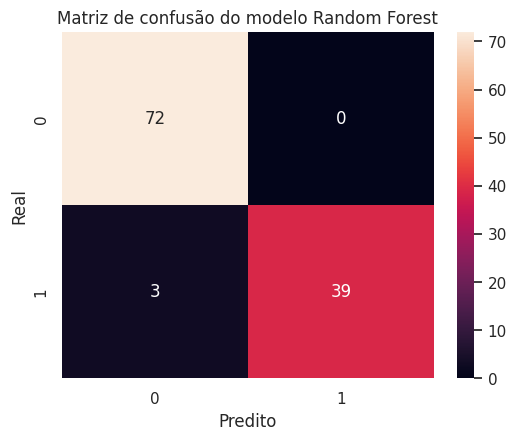

In [96]:
sns.set_palette("Blues")
plt.figure(figsize=(6, 4.5))

sns.heatmap(confusion_mtx, annot=True, fmt='d', cbar=True)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de confusão do modelo Random Forest')
plt.show()